In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model



In [3]:
# Set up directory paths
current_directory = os.getcwd()
train_dir = os.path.join(current_directory, "/home/abhi/MP/sign_data/merged_dataset/Train")
test_dir = os.path.join(current_directory, "/home/abhi/MP/sign_data/merged_dataset/Test")

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Generate data generators
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(200, 200),
                                                    batch_size=64,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(200, 200),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 5558 images belonging to 2 classes.
Found 2010 images belonging to 2 classes.


In [4]:
# Define the subclassed model
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.cnn1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3))
        self.cnn2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
        self.cnn3 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(512, activation='relu')
        self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        x = self.cnn1(inputs)
        x = self.cnn2(x)
        x = self.cnn3(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return x

In [4]:
# Load the custom CNN model
custom_cnn_weights_path = "/home/abhi/MP/saved_model/cnn.h5"
custom_cnn_model_loaded = MyModel()

2024-04-01 00:28:02.799883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-01 00:28:02.800643: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-01 00:28:02.800770: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-04-01 00:28:02.800851: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-04-01 00:28:02.800994: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [5]:


# Call the model to initialize its variables
_ = custom_cnn_model_loaded(np.zeros((1, 200, 200, 3), dtype=np.float32))

# Load weights into the custom CNN model
custom_cnn_model_loaded.load_weights(custom_cnn_weights_path)

# Freeze the layers of the custom CNN model
for layer in custom_cnn_model_loaded.layers:
    layer.trainable = False

# Compile the custom CNN model


2024-04-01 00:28:09.492324: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1233256448 exceeds 10% of free system memory.
2024-04-01 00:28:10.018212: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1233256448 exceeds 10% of free system memory.
2024-04-01 00:28:10.365263: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1233256448 exceeds 10% of free system memory.
2024-04-01 00:28:13.224718: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1233256448 exceeds 10% of free system memory.


In [6]:
custom_cnn_model_loaded.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the custom CNN model for 10 additional epochs
num_epochs = 10
custom_cnn_history = custom_cnn_model_loaded.fit(train_generator,
                                                 steps_per_epoch=train_generator.samples // train_generator.batch_size,
                                                 epochs=num_epochs,
                                                 validation_data=test_generator,
                                                 validation_steps=test_generator.samples // test_generator.batch_size,
                                                 verbose=2)


Epoch 1/10
173/173 - 147s - loss: 0.4309 - accuracy: 0.8004 - val_loss: 0.4291 - val_accuracy: 0.7928 - 147s/epoch - 847ms/step
Epoch 2/10
173/173 - 138s - loss: 0.4312 - accuracy: 0.7944 - val_loss: 0.4267 - val_accuracy: 0.7933 - 138s/epoch - 797ms/step
Epoch 3/10
173/173 - 143s - loss: 0.4337 - accuracy: 0.7984 - val_loss: 0.4300 - val_accuracy: 0.7913 - 143s/epoch - 829ms/step
Epoch 4/10
173/173 - 154s - loss: 0.4289 - accuracy: 0.7964 - val_loss: 0.4296 - val_accuracy: 0.7923 - 154s/epoch - 893ms/step
Epoch 5/10
173/173 - 164s - loss: 0.4254 - accuracy: 0.7973 - val_loss: 0.4300 - val_accuracy: 0.7923 - 164s/epoch - 951ms/step
Epoch 6/10
173/173 - 174s - loss: 0.4301 - accuracy: 0.8024 - val_loss: 0.4278 - val_accuracy: 0.7933 - 174s/epoch - 1s/step
Epoch 7/10
173/173 - 161s - loss: 0.4328 - accuracy: 0.7948 - val_loss: 0.4286 - val_accuracy: 0.7928 - 161s/epoch - 928ms/step
Epoch 8/10
173/173 - 162s - loss: 0.4294 - accuracy: 0.7942 - val_loss: 0.4303 - val_accuracy: 0.7918 - 162

In [7]:
print(custom_cnn_history.history)

{'loss': [0.4308687448501587, 0.43117132782936096, 0.4337040185928345, 0.42888620495796204, 0.42543694376945496, 0.43009045720100403, 0.43283048272132874, 0.4293612837791443, 0.42620158195495605, 0.43363896012306213], 'accuracy': [0.8003981113433838, 0.7944263219833374, 0.7984075546264648, 0.7964169383049011, 0.7973217368125916, 0.8023887276649475, 0.7947883009910583, 0.7942453622817993, 0.8045602440834045, 0.7938834428787231], 'val_loss': [0.42908012866973877, 0.4267394542694092, 0.4299986958503723, 0.4296085238456726, 0.4299708604812622, 0.42777442932128906, 0.42857369780540466, 0.4302809238433838, 0.428982138633728, 0.42747437953948975], 'val_accuracy': [0.7928427457809448, 0.7933467626571655, 0.7913306355476379, 0.7923387289047241, 0.7923387289047241, 0.7933467626571655, 0.7928427457809448, 0.7918346524238586, 0.7923387289047241, 0.7923387289047241]}


In [9]:
cnn_history = {
    "accuracy": [0.5206, 0.5794, 0.6334, 0.6922, 0.7148, 0.7401, 0.7429, 0.7463, 0.7584, 0.7495, 0.7524, 0.7568, 0.7693, 0.7606, 0.7740, 0.7667, 0.7657, 0.7669, 0.7673, 0.7789, 0.7742, 0.7771, 0.7819, 0.7781, 0.7801, 0.7852, 0.7861, 0.7816, 0.7805, 0.7850, 0.7877, 0.7895, 0.7879, 0.7792, 0.7845, 0.7870, 0.7886, 0.7915, 0.7933, 0.7921, 0.7968, 0.7910, 0.7847, 0.7952, 0.7948, 0.7926, 0.7923, 0.7942,0.8003981113433838, 0.7944263219833374, 0.7984075546264648, 0.7964169383049011, 0.7973217368125916, 0.8023887276649475, 0.7947883009910583, 0.7942453622817993, 0.8045602440834045, 0.7938834428787231],
    "loss": [2.2088, 0.6826, 0.6427, 0.5703, 0.5430, 0.5138, 0.5076, 0.5019, 0.4912, 0.4901, 0.4917, 0.4865, 0.4746, 0.4776, 0.4657, 0.4670, 0.4652, 0.4618, 0.4653, 0.4519, 0.4634, 0.4539, 0.4468, 0.4545, 0.4482, 0.4538, 0.4495, 0.4527, 0.4525, 0.4504, 0.4402, 0.4322, 0.4385, 0.4401, 0.4461, 0.4392, 0.4359, 0.4378, 0.4366, 0.4281, 0.4314, 0.4279, 0.4295, 0.4438, 0.4320, 0.4289, 0.4240, 0.4309, 0.4277,0.4308687448501587, 0.43117132782936096, 0.4337040185928345, 0.42888620495796204, 0.42543694376945496, 0.43009045720100403, 0.43283048272132874, 0.4293612837791443, 0.42620158195495605, 0.43363896012306213]
}

In [25]:
cnn_history = {
    "accuracy": [
    0.5206, 0.5794, 0.6334, 0.6922, 0.7148, 0.7401, 0.7429, 0.7463, 0.7584, 0.7495,
    0.7524, 0.7568, 0.7693, 0.7606, 0.7740, 0.7667, 0.7657, 0.7669, 0.7673, 0.7789,
    0.7742, 0.7771, 0.7819, 0.7781, 0.7801, 0.7852, 0.7861, 0.7816, 0.7805, 0.7850,
    0.7877, 0.7895, 0.7879, 0.7792, 0.7845, 0.7870, 0.7886, 0.7915, 0.7933, 0.7921,
    0.7968, 0.7910, 0.7847, 0.7952, 0.7948, 0.7926, 0.7923, 0.7942, 0.800398111, 0.794426322,
    0.798407555, 0.796416938, 0.7886, 0.7915, 0.7933, 0.7921, 0.7968, 0.7910, 0.7923, 0.7933
],
    "loss": [2.2088, 0.6826, 0.6427, 0.5703, 0.5430, 0.5138, 0.5076, 0.5019, 0.4912, 0.4901, 0.4917, 0.4865, 0.4746, 0.4776, 0.4657, 0.4670, 0.4652, 0.4618, 0.4653, 0.4519, 0.4634, 0.4539, 0.4468, 0.4545, 0.4482, 0.4538, 0.4495, 0.4527, 0.4525, 0.4504, 0.4402, 0.4322, 0.4385, 0.4401, 0.4461, 0.4392, 0.4359, 0.4378, 0.4366, 0.4281, 0.4314, 0.4279, 0.4295, 0.4438, 0.4320, 0.4289, 0.4240, 0.4309, 0.4277,0.4308687448501587, 0.43117132782936096, 0.4337040185928345, 0.42888620495796204, 0.42543694376945496, 0.43009045720100403, 0.43283048272132874, 0.4293612837791443, 0.42620158195495605, 0.43363896012306213]
}

In [24]:
# cnn_history = {
#     "accuracy": [0.5206, 0.5794, 0.6334, 0.6922, 0.7148, 0.7401, 0.7429, 0.7463, 0.7584, 0.7495, 0.7524, 0.7568, 0.7693, 0.7606, 0.7740, 0.7667, 0.7657, 0.7669, 0.7673, 0.7789, 0.7742, 0.7771, 0.7819, 0.7781, 0.7801, 0.7852, 0.7861, 0.7816, 0.7805, 0.7850, 0.7877, 0.7895, 0.7879, 0.7792, 0.7845, 0.7870, 0.7886, 0.7915, 0.7933, 0.7921, 0.7968, 0.7910, 0.7847, 0.7952, 0.7948, 0.7926, 0.7923, 0.7942],
#     "loss": [2.2088, 0.6826, 0.6427, 0.5703, 0.5430, 0.5138, 0.5076, 0.5019, 0.4912, 0.4901, 0.4917, 0.4865, 0.4746, 0.4776, 0.4657, 0.4670, 0.4652, 0.4618, 0.4653, 0.4519, 0.4634, 0.4539, 0.4468, 0.4545, 0.4482, 0.4538, 0.4495, 0.4527, 0.4525, 0.4504, 0.4402, 0.4322, 0.4385, 0.4401, 0.4461, 0.4392, 0.4359, 0.4378, 0.4366, 0.4281, 0.4314, 0.4279, 0.4295, 0.4438, 0.4320, 0.4289, 0.4240, 0.4309, 0.4277]
# }

# Count the length of accuracy and loss arrays
accuracy_length = len(cnn_history['accuracy'])
loss_length = len(cnn_history['loss'])

# Print the lengths
print("Length of accuracy array:", accuracy_length)
print("Length of loss array:", loss_length)


Length of accuracy array: 52
Length of loss array: 59


In [21]:
import csv

# Writing CNN history to a CSV file
with open('cnn_history.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Accuracy', 'Loss'])
    writer.writerows(zip(cnn_history['accuracy'], cnn_history['loss']))

# # Writing VGG history to a CSV file
# with open('vgg_history.csv', 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(['Accuracy', 'Loss'])
#     writer.writerows(zip(vgg_history['accuracy'], vgg_history['loss']))

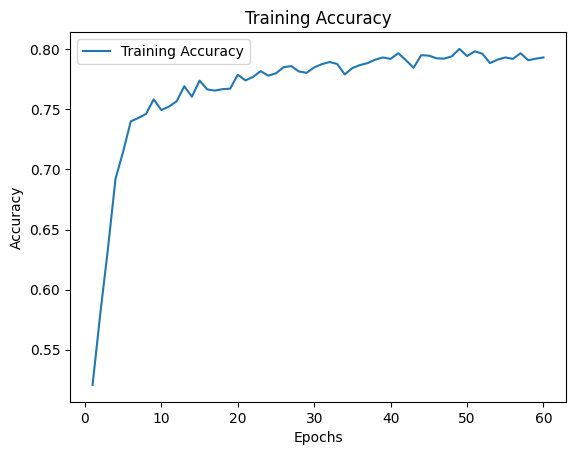

In [26]:
import matplotlib.pyplot as plt

# Define the number of epochs
epochs = range(1, len(cnn_history['accuracy']) + 1)

# Plot accuracy
plt.plot(epochs, cnn_history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# # Plot loss
# plt.plot(epochs, cnn_history['loss'][:-1], label='Training Loss')
# plt.title('Training Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [15]:
print("Length of epochs:", len(epochs))
print("Length of accuracy:", len(cnn_history['accuracy']))
print("Length of loss:", len(cnn_history['loss']))


Length of epochs: 58
Length of accuracy: 58
Length of loss: 59


In [5]:
# Load VGG-16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze VGG-16 layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the VGG-16 base
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
vgg_model = Model(inputs=base_model.input, outputs=predictions)



2024-04-01 02:00:02.909425: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-01 02:00:02.909687: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-01 02:00:02.909854: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-04-01 02:00:02.909940: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-04-01 02:00:02.910017: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [9]:
vgg_model_loaded = load_model('/home/abhi/MP/saved_model/VGG16_merged_model_new.h5')


In [10]:
# Compile the VGG model
vgg_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the VGG model for 10 additional epochs
vgg_history = vgg_model.fit(train_generator,
                            steps_per_epoch=train_generator.samples // train_generator.batch_size,
                            epochs=10,
                            validation_data=test_generator,
                            validation_steps=test_generator.samples // test_generator.batch_size,
                            verbose=2)


Epoch 1/10


2024-04-01 02:00:53.827849: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655360000 exceeds 10% of free system memory.
2024-04-01 02:00:54.088504: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655360000 exceeds 10% of free system memory.
2024-04-01 02:01:02.238300: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655360000 exceeds 10% of free system memory.
2024-04-01 02:01:02.484590: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655360000 exceeds 10% of free system memory.
2024-04-01 02:01:12.281782: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655360000 exceeds 10% of free system memory.


86/86 - 1359s - loss: 0.8085 - accuracy: 0.6509 - val_loss: 0.5615 - val_accuracy: 0.7349 - 1359s/epoch - 16s/step
Epoch 2/10
86/86 - 1186s - loss: 0.5525 - accuracy: 0.7248 - val_loss: 0.5415 - val_accuracy: 0.7445 - 1186s/epoch - 14s/step
Epoch 3/10
86/86 - 994s - loss: 0.5323 - accuracy: 0.7372 - val_loss: 0.5186 - val_accuracy: 0.7379 - 994s/epoch - 12s/step
Epoch 4/10
86/86 - 57549s - loss: 0.5140 - accuracy: 0.7448 - val_loss: 0.6293 - val_accuracy: 0.6502 - 57549s/epoch - 669s/step
Epoch 5/10
86/86 - 939s - loss: 0.5030 - accuracy: 0.7499 - val_loss: 0.6475 - val_accuracy: 0.7097 - 939s/epoch - 11s/step
Epoch 6/10
86/86 - 932s - loss: 0.4736 - accuracy: 0.7745 - val_loss: 0.5440 - val_accuracy: 0.7152 - 932s/epoch - 11s/step
Epoch 7/10
86/86 - 949s - loss: 0.4517 - accuracy: 0.7849 - val_loss: 0.4818 - val_accuracy: 0.7722 - 949s/epoch - 11s/step
Epoch 8/10
86/86 - 1007s - loss: 0.4682 - accuracy: 0.7783 - val_loss: 0.5101 - val_accuracy: 0.7681 - 1007s/epoch - 12s/step
Epoch 9/

In [ ]:

# Print the training history
print(custom_cnn_history.history)
print(vgg_history.history)
